# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [4]:

# set up lists to hold reponse info
city_checked=[]
lng = []
lat = []
temp = []
humidity = []
wind = []
cloud = []
country = []
date=[]
record_count=0
set_count=0


# Loop through the list of cities and perform a request for data on each city

    
for i, city in enumerate(cities):
    set_count = i // 50 + 1
    record_count= i % 50 + 1 

    try:
        response = requests.get(query_url + city).json()  
        city_checked.append(response['name'])
        lng.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        date.append(response['dt'])
        country.append(response['sys']['country'])

            #print a print log of each city as it'sbeing processed (with the city number and city name)
        print(f"Processing Record {record_count} of set {set_count} |{city}")
    except (KeyError, IndexError):
        print("City not found. Skipping...")

      

Processing Record 1 of set 1 |kunming
Processing Record 2 of set 1 |cherskiy
Processing Record 3 of set 1 |along
Processing Record 4 of set 1 |avarua
Processing Record 5 of set 1 |chokurdakh
Processing Record 6 of set 1 |vila franca do campo
Processing Record 7 of set 1 |kapaa
Processing Record 8 of set 1 |guerrero negro
Processing Record 9 of set 1 |trairi
Processing Record 10 of set 1 |araouane
Processing Record 11 of set 1 |vaini
City not found. Skipping...
Processing Record 13 of set 1 |santa maria
City not found. Skipping...
Processing Record 15 of set 1 |izhma
Processing Record 16 of set 1 |rikitea
Processing Record 17 of set 1 |svarstad
Processing Record 18 of set 1 |albany
Processing Record 19 of set 1 |codrington
Processing Record 20 of set 1 |punta arenas
Processing Record 21 of set 1 |nishihara
Processing Record 22 of set 1 |severo-kurilsk
Processing Record 23 of set 1 |miedzyrzecz
Processing Record 24 of set 1 |dunedin
Processing Record 25 of set 1 |bonthe
Processing Record

Processing Record 12 of set 5 |dodge city
Processing Record 13 of set 5 |chuy
Processing Record 14 of set 5 |svetlyy
Processing Record 15 of set 5 |awjilah
Processing Record 16 of set 5 |ballangen
Processing Record 17 of set 5 |cabo san lucas
Processing Record 18 of set 5 |kidal
Processing Record 19 of set 5 |shellbrook
Processing Record 20 of set 5 |belmonte
Processing Record 21 of set 5 |belogorsk
City not found. Skipping...
Processing Record 23 of set 5 |sovetskiy
Processing Record 24 of set 5 |stornoway
Processing Record 25 of set 5 |puerto ayacucho
Processing Record 26 of set 5 |oksfjord
Processing Record 27 of set 5 |tuatapere
Processing Record 28 of set 5 |beberibe
Processing Record 29 of set 5 |bosobolo
Processing Record 30 of set 5 |alta floresta
Processing Record 31 of set 5 |hemnesberget
Processing Record 32 of set 5 |joue-les-tours
Processing Record 33 of set 5 |kiunga
Processing Record 34 of set 5 |talaya
Processing Record 35 of set 5 |baykit
Processing Record 36 of set 5 

Processing Record 21 of set 9 |wanaka
Processing Record 22 of set 9 |praia da vitoria
Processing Record 23 of set 9 |lagoa
Processing Record 24 of set 9 |tessalit
Processing Record 25 of set 9 |wonthaggi
Processing Record 26 of set 9 |narsaq
Processing Record 27 of set 9 |takoradi
Processing Record 28 of set 9 |tevaitoa
Processing Record 29 of set 9 |moose jaw
Processing Record 30 of set 9 |kotido
Processing Record 31 of set 9 |sumbe
Processing Record 32 of set 9 |coahuayana
City not found. Skipping...
Processing Record 34 of set 9 |provideniya
Processing Record 35 of set 9 |dudinka
Processing Record 36 of set 9 |galesong
Processing Record 37 of set 9 |axioupoli
Processing Record 38 of set 9 |lerwick
Processing Record 39 of set 9 |abu dhabi
Processing Record 40 of set 9 |mount isa
Processing Record 41 of set 9 |lata
Processing Record 42 of set 9 |road town
Processing Record 43 of set 9 |pallisa
Processing Record 44 of set 9 |naze
Processing Record 45 of set 9 |abu kamal
Processing Reco

Processing Record 26 of set 13 |auxerre


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": city_checked,
    "lng": lng,
    "lat": lat,
    "Max Temp": temp,
    "Humidity": humidity,
    "Wind Speed": wind,
    "Cloudiness": cloud,
    "Country": country,
    "Date": date
    
}
weather_data = pd.DataFrame(weather_dict)

In [9]:
# Save the updated dataframe as a csv
weather_data.to_csv("../output_data/weather_data.csv", encoding="utf-8", index=False)
weather_data.head()

,city,lng,lat,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
0,Kunming,102.7183,25.0389,26.20,51,4.19,100,CN,1624010465
1,Cherskiy,161.3000,68.7500,3.33,76,6.91,100,RU,1624010598
2,Along,94.7667,28.1667,27.77,91,0.95,100,IN,1624010598
3,Avarua,-159.7750,-21.2078,25.30,84,8.71,100,CK,1624010598
4,Chokurdakh,147.9167,70.6333,13.92,38,1.50,86,RU,1624010598


In [10]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        576 non-null    object 
 1   lng         576 non-null    float64
 2   lat         576 non-null    float64
 3   Max Temp    576 non-null    float64
 4   Humidity    576 non-null    int64  
 5   Wind Speed  576 non-null    float64
 6   Cloudiness  576 non-null    int64  
 7   Country     576 non-null    object 
 8   Date        576 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 40.6+ KB


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
weather_data_path="../output_data/weather_data.csv"
weather_data_df=pd.read_csv(weather_data_path,encoding="utf-8")
weather_data_df.describe()

,lng,lat,Max Temp,Humidity,Wind Speed,Cloudiness,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,18.600995,20.100884,20.626736,66.741319,3.485417,54.239583,1.624011e+09
std,90.186536,33.332657,8.924992,23.613278,2.364511,39.467343,8.410949e+01
min,-179.166700,-54.800000,-6.030000,3.000000,0.000000,0.000000,1.624010e+09
25%,-60.697925,-7.840600,14.065000,54.000000,1.790000,9.000000,1.624011e+09
50%,22.269500,24.602200,22.070000,72.000000,3.060000,60.500000,1.624011e+09
75%,100.035625,49.170850,26.760000,85.000000,4.857500,96.000000,1.624011e+09
max,179.316700,78.218600,41.710000,100.000000,12.870000,100.000000,1.624011e+09


In [12]:
#  Get the indices of cities that have humidity equal or over 100%.

Humidity_100=weather_data_df.loc[weather_data_df["Humidity"]>=100]

print (Humidity_100)



            city       lng      lat  Max Temp  Humidity  Wind Speed  \
10         Vaini -175.2000 -21.2000     21.09       100        1.54   
185   Nueva Loja  -76.8828   0.0847     20.51       100        0.15   
312    Fonte Boa  -66.2662  -2.4959     21.47       100        0.54   
375      Inírida  -67.9239   3.8653     21.89       100        0.34   
426  San Ignacio  -89.0714  17.1561     22.08       100        0.00   
428     Coquimbo  -71.3436 -29.9533      9.85       100        2.06   
510   Río Cuarto  -64.3499 -33.1307      2.87       100        3.60   
541  Clyde River  -68.5914  70.4692      0.13       100        3.09   

     Cloudiness Country        Date  
10           20      TO  1624010600  
185         100      EC  1624010649  
312          52      BR  1624010683  
375          90      CO  1624010701  
426          75      BZ  1624010715  
428          90      CL  1624010716  
510          90      AR  1624010738  
541          90      CA  1624010747  


In [13]:
#check the index of cities with humidity equal or over 100
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
Humidity_100.index

Int64Index([10, 185, 312, 375, 426, 428, 510, 541], dtype='int64')

In [14]:
# dropping the city with humidity equal or over 100 by reference the humidity_100 index
# Passing "inplace=False" and make a new data fram "clean_data".
clean_data=weather_data_df.drop(Humidity_100.index, inplace = False)
clean_data

,city,lng,lat,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
0,Kunming,102.7183,25.0389,26.20,51,4.19,100,CN,1624010465
1,Cherskiy,161.3000,68.7500,3.33,76,6.91,100,RU,1624010598
2,Along,94.7667,28.1667,27.77,91,0.95,100,IN,1624010598
3,Avarua,-159.7750,-21.2078,25.30,84,8.71,100,CK,1624010598
4,Chokurdakh,147.9167,70.6333,13.92,38,1.50,86,RU,1624010598
...,...,...,...,...,...,...,...,...,...
571,Rio Grande City,-98.8203,26.3798,24.90,83,1.42,73,US,1624010755
572,Ostrovnoy,39.5131,68.0531,9.60,60,3.32,100,RU,1624010755
573,Pandharpur,75.3333,17.6667,29.79,56,10.03,90,IN,1624010711
574,Nushki,66.0215,29.5542,36.93,9,5.07,0,PK,1624010756


In [15]:
clean_data.describe()

,lng,lat,Max Temp,Humidity,Wind Speed,Cloudiness,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,20.059511,20.375553,20.706180,66.272887,3.514577,53.934859,1.624011e+09
std,89.876326,33.281834,8.902977,23.444132,2.363174,39.547498,8.440177e+01
min,-179.166700,-54.800000,-6.030000,3.000000,0.000000,0.000000,1.624010e+09
25%,-56.682875,-7.748625,14.092500,53.000000,1.790000,8.000000,1.624011e+09
50%,22.999250,25.073050,22.290000,71.000000,3.090000,59.000000,1.624011e+09
75%,100.509425,49.191650,26.830000,85.000000,4.897500,96.000000,1.624011e+09
max,179.316700,78.218600,41.710000,99.000000,12.870000,100.000000,1.624011e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

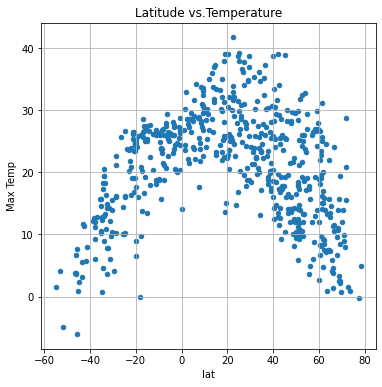

In [16]:
#Latitude vs. Temperature Plot
clean_data.plot(kind="scatter", x="lat", y="Max Temp", grid=True, figsize=(6,6),
              title="Latitude vs.Temperature");
plt.savefig("../output_data/lat vs Temp.png") 

## Latitude vs. Humidity Plot

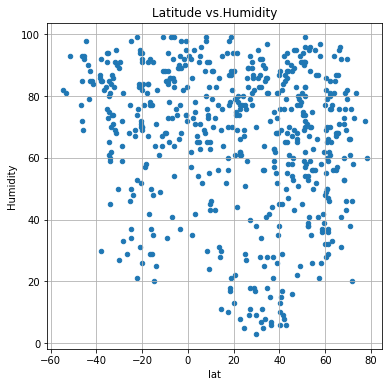

In [17]:
#Latitude vs. Humidity Plot
clean_data.plot(kind="scatter", x="lat", y="Humidity", grid=True, figsize=(6,6),
              title="Latitude vs.Humidity");
plt.savefig("../output_data/lat vs Humidity.png") 

## Latitude vs. Cloudiness Plot

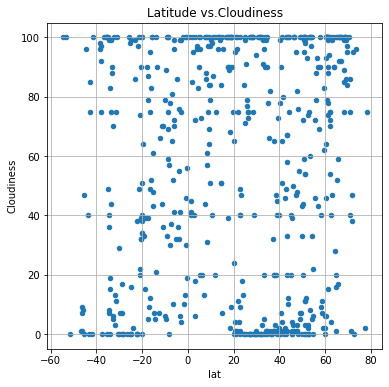

In [18]:
#Latitude vs. Cloudiness Plot
clean_data.plot(kind="scatter", x="lat", y="Cloudiness", grid=True, figsize=(6,6),
              title="Latitude vs.Cloudiness");
plt.savefig("../output_data/lat vs Cloudiness.png") 

## Latitude vs. Wind Speed Plot

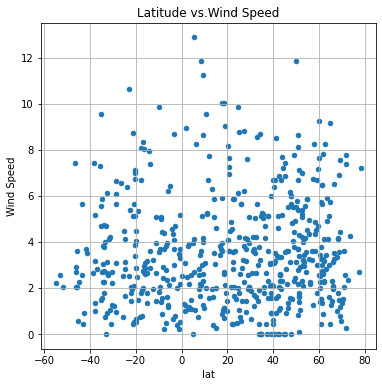

In [19]:
#Latitude vs. Wind Speed Plot
clean_data.plot(kind="scatter", x="lat", y="Wind Speed", grid=True, figsize=(6,6),
              title="Latitude vs.Wind Speed");
plt.savefig("../output_data/lat vs Wind Speed.png") 

## Linear Regression

In [ ]:

#Northern Hemisphere (greater than or equal to 0 degrees latitude) and 
#Southern Hemisphere (less than 0 degrees latitude)

In [20]:
#setup a Northern Hemishpere dataframe
Northern_Hemisphere=weather_data_df.loc[weather_data_df["lat"]>=0.00]
Northern_Hemisphere.head()                                                     

,city,lng,lat,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
0,Kunming,102.7183,25.0389,26.20,51,4.19,100,CN,1624010465
1,Cherskiy,161.3000,68.7500,3.33,76,6.91,100,RU,1624010598
2,Along,94.7667,28.1667,27.77,91,0.95,100,IN,1624010598
4,Chokurdakh,147.9167,70.6333,13.92,38,1.50,86,RU,1624010598
5,Vila Franca do Campo,-25.4333,37.7167,19.23,59,2.32,65,PT,1624010599


In [21]:
#setup a Southern Hemishpere dataframe
Southern_Hemisphere=weather_data_df.loc[weather_data_df["lat"]<0.00]
Southern_Hemisphere.describe()   

,lng,lat,Max Temp,Humidity,Wind Speed,Cloudiness,Date
count,178.000000,178.000000,178.000000,178.00000,178.000000,178.000000,1.780000e+02
mean,29.826108,-21.760142,18.062022,73.97191,3.345955,50.084270,1.624011e+09
std,94.690393,13.319170,8.149394,19.51428,2.208435,37.313585,9.801079e+01
min,-175.200000,-54.800000,-6.030000,20.00000,0.000000,0.000000,1.624010e+09
25%,-53.720575,-32.940650,12.130000,66.25000,1.800000,10.250000,1.624011e+09
50%,26.987500,-20.375450,20.110000,78.50000,2.845000,46.500000,1.624011e+09
75%,122.133325,-9.818900,25.277500,88.00000,4.465000,89.750000,1.624011e+09
max,175.700000,-0.600000,29.420000,100.00000,10.640000,100.000000,1.624011e+09


In [22]:
max_temp=Northern_Hemisphere.iloc[:,3]
max_temp

0      26.20
1       3.33
2      27.77
4      13.92
5      19.23
       ...  
571    24.90
572     9.60
573    29.79
574    36.93
575    27.92
Name: Max Temp, Length: 398, dtype: float64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the correlation between weight and tumor volume is -0.62
R squared: 0.38626726009240214


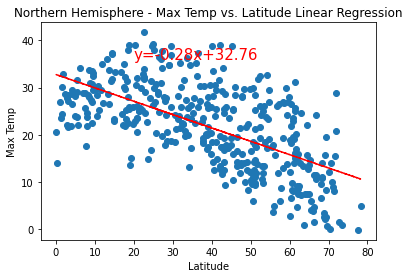

In [23]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Northern_Hemisphere.iloc[:,2]
max_temp=Northern_Hemisphere.iloc[:,3]
correlation=st.pearsonr(lat,max_temp)

slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,max_temp)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,max_temp)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"the correlation between weight and tumor volume is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}")  
plt.savefig("../output_data/Northern Hemisphere lat vs Max temp linear regressoin.png") 
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the correlation between weight and tumor volume is 0.78
R squared: 0.6118064238729868


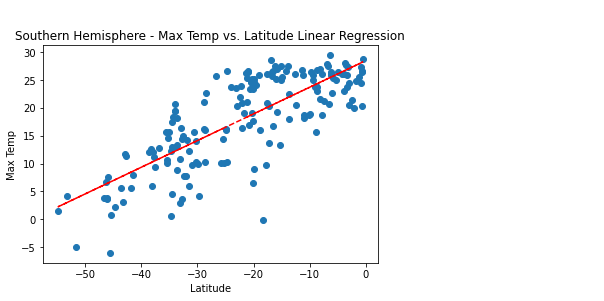

In [24]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Southern_Hemisphere.iloc[:,2]
max_temp=Southern_Hemisphere.iloc[:,3]
correlation=st.pearsonr(lat,max_temp)

slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,max_temp)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,max_temp)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

print(f"the correlation between weight and tumor volume is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}")

plt.savefig("../output_data/Southern Hemisphere lat vs Max temp linear regressoin.png") 
plt.show()  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the correlation between Latitude and humidity is -0.04
R squared: 0.0013826478036775296


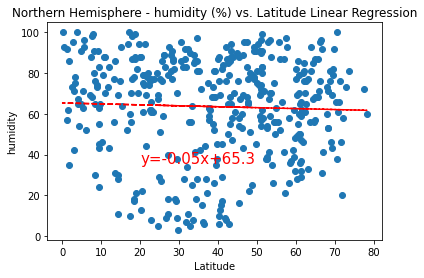

In [25]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Northern_Hemisphere.iloc[:,2]
humidity=Northern_Hemisphere.iloc[:,4]
correlation=st.pearsonr(lat,humidity)

slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,humidity)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,humidity)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("humidity")
plt.title("Northern Hemisphere - humidity (%) vs. Latitude Linear Regression")

print(f"the correlation between Latitude and humidity is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}") 
plt.savefig("../output_data/Northern_Hemisphere lat vs Humidity linear regressoin.png") 
plt.show()  

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the correlation between Latitude and humidity is -0.05
R squared: 0.0022350932597770996


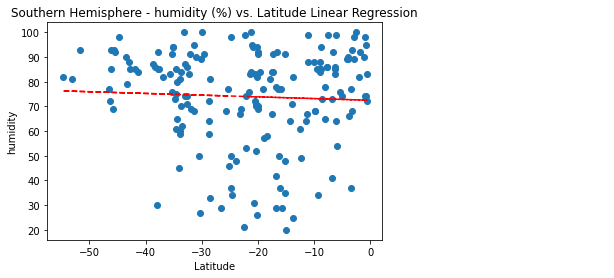

In [26]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Southern_Hemisphere.iloc[:,2]
humidity=Southern_Hemisphere.iloc[:,4]
correlation=st.pearsonr(lat,humidity)

slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,humidity)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,humidity)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("humidity")
plt.title("Southern Hemisphere - humidity (%) vs. Latitude Linear Regression")

print(f"the correlation between Latitude and humidity is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}") 
plt.savefig("../output_data/Southernn_Hemisphere lat vs Humidity linear regressoin.png") 
plt.show()  

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the correlation between Latitude and Cloudiness is -0.03
R squared: 0.0008662174211802736


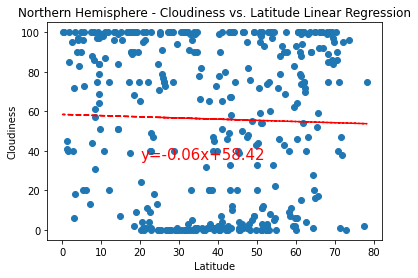

In [27]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Northern_Hemisphere.iloc[:,2]
Cloudiness=Northern_Hemisphere.iloc[:,6]
correlation=st.pearsonr(lat,Cloudiness)

slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,Cloudiness)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,Cloudiness)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

print(f"the correlation between Latitude and Cloudiness is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}") 
plt.savefig("../output_data/Northern_Hemisphere lat vs Cloudiness linear regressoin.png") 
plt.show()  

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the correlation between Latitude and Cloudiness is 0.09
R squared: 0.0072508616086559155


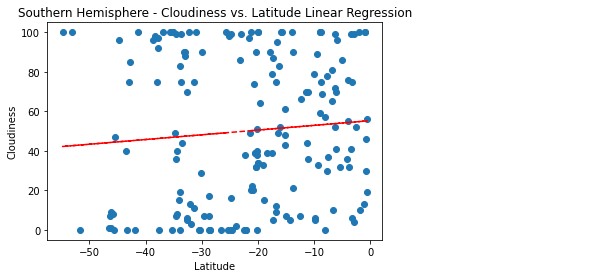

In [28]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Southern_Hemisphere.iloc[:,2]
Cloudiness=Southern_Hemisphere.iloc[:,6]
correlation=st.pearsonr(lat,Cloudiness)

slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,Cloudiness)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,Cloudiness)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

print(f"the correlation between Latitude and Cloudiness is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}") 
plt.savefig("../output_data/Southernn_Hemisphere lat vs Cloudiness linear regressoin.png") 
plt.show()  

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the correlation between Latitude and Wind Speed is 0.03
R squared: 0.0009680551911460765


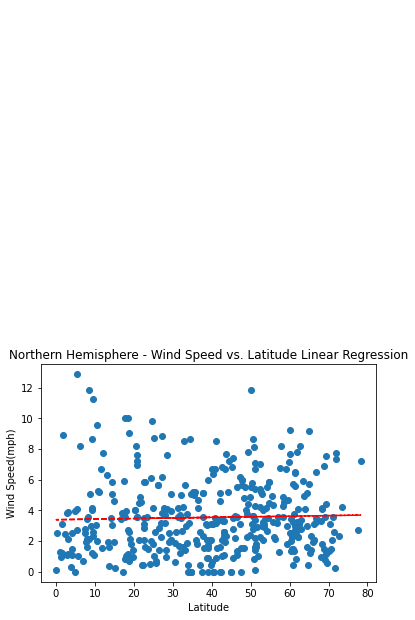

In [29]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Northern_Hemisphere.iloc[:,2]
Wind_Speed=Northern_Hemisphere.iloc[:,5]
correlation=st.pearsonr(lat,Wind_Speed)
slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,Wind_Speed)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,Wind_Speed)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
 
print(f"the correlation between Latitude and Wind Speed is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}") 
plt.savefig("../output_data/Northern_Hemisphere lat vs Wind Speed linear regressoin.png") 
plt.show() 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the correlation between Latitude and Wind Speed is -0.0
R squared: 3.458204752077481e-07


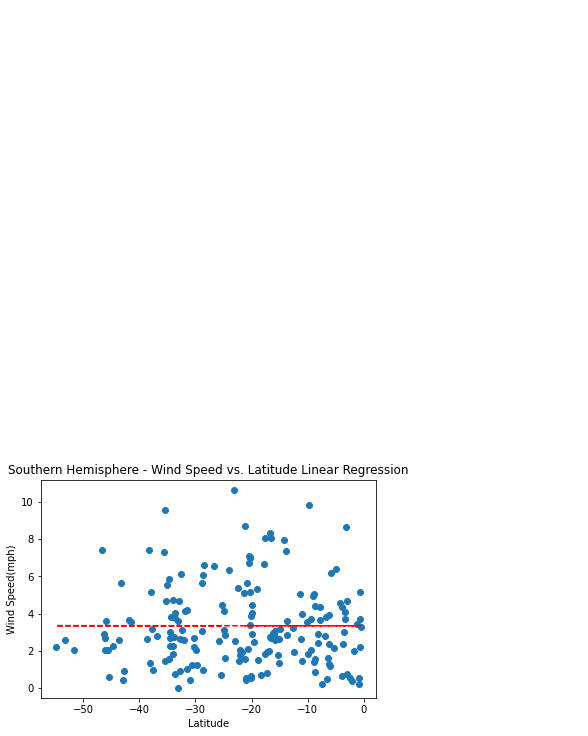

In [30]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Southern_Hemisphere.iloc[:,2]
Wind_Speed=Southern_Hemisphere.iloc[:,5]
correlation=st.pearsonr(lat,Wind_Speed)
slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,Wind_Speed)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,Wind_Speed)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

print(f"the correlation between Latitude and Wind Speed is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}") 
plt.savefig("../output_data/Southern_Hemisphere lat vs Wind Speed linear regressoin.png") 
plt.show()  